In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc

In [10]:
data = pd.read_csv('S05-hw-dataset.csv')
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


In [15]:
data['default'].value_counts(normalize=True).rename('fraction').to_frame()

,fraction
default,
0,0.589667
1,0.410333


In [16]:
sum(data.duplicated())

0

Набор данных состоит из 3000 записей, 16-ти признаков, один из которых - id клиента. Все имеющиеся признаки числовые.

Повторяющихся записей нет, как и пропущенных значений.

Явных аномалий в данных нет.

Распределение классов не совсем сбалансировано (60% против 40%), но сильного дисбаланса нет.


In [23]:
X, y = data.iloc[:, 1:-1], data.iloc[:, -1]

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=seed)

print('Размеры выборок:')
print('  train:', X_train.shape)
print('  test: ', X_test.shape)

print('\nРаспределение классов (train):')
print(y_train.value_counts(normalize=True))

print('\nРаспределение классов (test):')
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (2250, 15)
  test:  (750, 15)

Распределение классов (train):
default
0    0.589778
1    0.410222
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.589333
1    0.410667
Name: proportion, dtype: float64


In [41]:
dummy = DummyClassifier(strategy='stratified', random_state=seed)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_pred_proba_dummy = dummy.predict_proba(X_test)

print('Dummy Classifier, strategy="stratified"')
print('Accuracy:', accuracy_score(y_test, y_pred_dummy))
print('Precision:', precision_score(y_test, y_pred_dummy))
print('Recall:', recall_score(y_test, y_pred_dummy))
print('F1-score:', f1_score(y_test, y_pred_dummy))
print('Roc-Auc score:', roc_auc_score(y_test, y_pred_proba_dummy[:, 1]))

Dummy Classifier, strategy="stratified"
Accuracy: 0.54
Precision: 0.43973941368078173
Recall: 0.4383116883116883
F1-score: 0.43902439024390244
Roc-Auc score: 0.5245857084092378


В качестве baseline модели был выбран DummyClassifier со стратегий "stratified", где классификатор предсказывает классы случайно, но с сохранением пропорций из обучающей выборки (60% на 40%). При этом для каждого класса выбирает класс 0 с вероятностью 0.6 (примерно), а класс 1 - с вероятностью 0.4 (примерно). 

Таким образом, accuracy примерно показывает долю наиболее часто встречающегося класса (54%), precision, recall и f1 score примерно равны 44%, а Roc Auc примерно равен 52%, что не сильно лучше случаного угадывания

Эта модель задает нижнюю планку качества, то есть нормальная модель должна показывать результат получше.

In [45]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=5000, random_state=seed))
])

param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print('Лучшие параметры:', grid_search.best_params_)
print('Лучший ROC-AUC (по CV):', grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 1.0}
Лучший ROC-AUC (по CV): 0.8631695636003741


In [51]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

print('Logistic Regression, best params: C=1, test')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-Auc score:', roc_auc_score(y_test, y_pred_proba[:, 1]))

Logistic Regression, best params: C=1, test
Accuracy: 0.7933333333333333
Precision: 0.7802197802197802
Recall: 0.6915584415584416
F1-score: 0.7332185886402753
Roc-Auc score: 0.8647088205911735


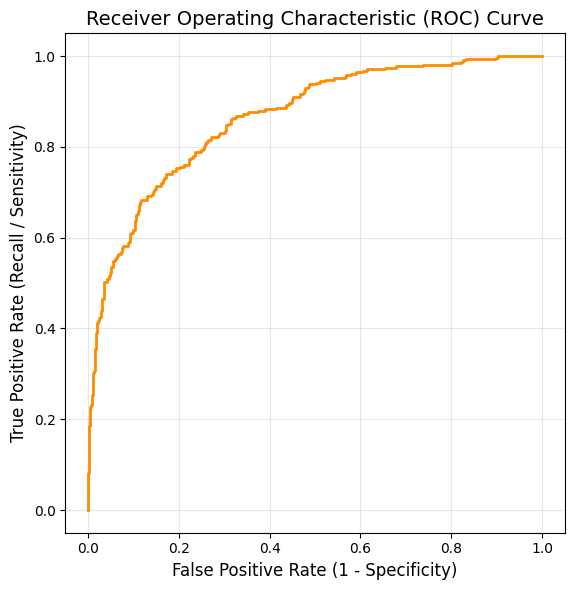

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall / Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.grid(True, alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('figures/ROC curve.png')
plt.show()

In [65]:
scores = pd.DataFrame({'Accuracy': [accuracy_score(y_test, y_pred_dummy), accuracy_score(y_test, y_pred)], 
                       'Precision': [precision_score(y_test, y_pred_dummy), precision_score(y_test, y_pred)], 
                       'Recall': [recall_score(y_test, y_pred_dummy), recall_score(y_test, y_pred)], 
                       'F1-score': [f1_score(y_test, y_pred_dummy), f1_score(y_test, y_pred)], 
                       'ROC AUC': [roc_auc_score(y_test, y_pred_dummy), roc_auc_score(y_test, y_pred_proba[:, 1])]}, 
                       index=['DummyClassifier', 'LogisticRegression'])
scores

,Accuracy,Precision,Recall,F1-score,ROC AUC
DummyClassifier,0.540000,0.439739,0.438312,0.439024,0.524586
LogisticRegression,0.793333,0.780220,0.691558,0.733219,0.864709


Логистическая регрессия намного лушчше по качеству, чем baseline модель по всем рассматриваемым метрикам.

Accuracy выросла с 54% до почти 80% (на 26%). ROC AUC увеличилась сильнее всего с 0.52 до 0.86 (на 0.34). То есть метрики сильно улучшились.

Поиск по сетке показал, что модель показывает лучшие результаты с умеренной регуляризацией, но тем не менее значение было выбрано больше, чем то, что указано в модели по умолчанию.

Конечно, для этой задачи более разумной моделью является логистическая регрессия, как минимум потому, что ключевые метрики намного выше, чем у baseline модели, которая вообще не опирается при предсказании на информацию из признаков.